In [1]:
import wandb
api = wandb.Api()
run = api.run("/thesis-mayhem/multitask-mayhem/runs/3f1ho2nh")

CommError: Could not find run <Run thesis-mayhem/multitask-mayhem/3f1ho2nh (not found)>

In [ ]:
df = run.history()
df.head()

,trainer/global_step,_step,_runtime,lr-Adam,_timestamp,train_loss_step.master,train_loss_step.seg,loss_weight_step.det,epoch,loss_weight_step.seg,...,val_loss.seg,earlystop,val_loss.det,best_val,loss_weight_epoch.seg,epoch_sanity,train_loss_epoch.seg,loss_weight_epoch.det,train_loss_epoch.det,train_loss_epoch.master
0,0,0,14.127838,0.001,1.673952e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49,1,30.496376,NaN,1.673952e+09,1.926432,-0.288036,-0.659745,0.0,-0.743369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99,2,44.093475,NaN,1.673952e+09,1.615217,-0.311748,-0.625910,0.0,-0.796520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,149,3,57.940157,NaN,1.673952e+09,1.080640,-0.359409,-0.596184,0.0,-0.848902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149,4,135.225071,NaN,1.673952e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df["epoch"]

0     NaN
1     0.0
2     0.0
3     0.0
4     NaN
5     0.0
6     0.0
7     NaN
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    NaN
15    2.0
16    2.0
17    2.0
18    2.0
19    2.0
20    NaN
21    3.0
22    3.0
23    3.0
24    3.0
25    3.0
26    3.0
27    NaN
28    4.0
29    4.0
30    4.0
31    4.0
32    NaN
33    4.0
34    4.0
35    NaN
36    5.0
37    5.0
38    5.0
39    5.0
40    5.0
41    NaN
42    6.0
43    6.0
44    6.0
45    6.0
46    6.0
47    6.0
48    NaN
49    7.0
50    7.0
51    7.0
52    7.0
53    7.0
54    7.0
55    NaN
56    8.0
57    8.0
58    8.0
Name: epoch, dtype: float64

<AxesSubplot: xlabel='epoch', ylabel='[val_loss.seg]'>

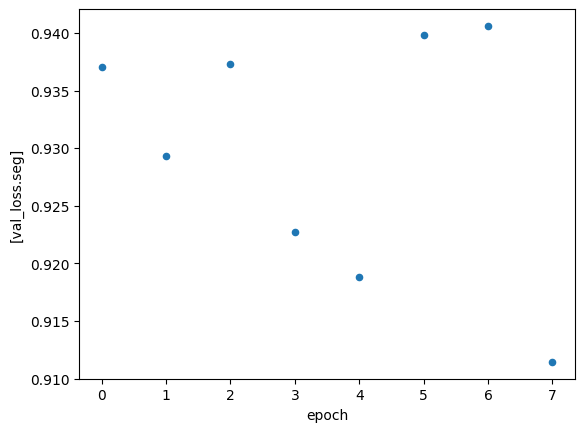

In [ ]:
df.plot.scatter(y=["val_loss.seg"], x="epoch")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relativediff(n1, n2):
    diff = np.exp((n1 - n2) / n2)
    return diff / diff.sum()

def dwa(n1, n2, T, K):
    ratio = n1 / n2
    return (K * np.exp(ratio/T)) / np.exp(ratio/T).sum()

[0.90348122 1.09651878] [0.27947834 0.16847965]
[0.7868516 1.2131484] [0.64723156 0.38280688]
[0.45484516 1.54515484] [0.68369037 0.76808605]
[0.49927886 1.50072114] [0.32428195 0.61158238]
[0.80468353 1.19531647] [0.52122645 0.33064137]
[0.52035883 1.47964117] [0.10527158 0.52527802]
[1.0407472 0.9592528] [0.83078459 0.18862854]
[0.7462534 1.2537466] [0.84987677 0.47907082]
[0.3213343 1.6786657] [0.15976164 0.82914681]
[0.37147465 1.62852535] [0.19982276 0.7568195 ]
[0.89071152 1.10928848] [0.52513229 0.24797231]
[0.45017156 1.54982844] [0.31619373 0.67385254]
[0.4071902 1.5928098] [0.13753418 0.68562623]
[0.71833855 1.28166145] [0.75388029 0.48137218]
[0.79497256 1.20502744] [0.89979133 0.44385751]
[0.48639659 1.51360341] [0.53512456 0.68576417]
[0.58956181 1.41043819] [0.58306899 0.57396612]
[0.54223278 1.45776722] [0.47975935 0.6011288 ]
[0.30247997 1.69752003] [0.10720479 0.84879558]
[0.90181214 1.09818786] [0.30090728 0.17594527]
[0.69363458 1.30636542] [0.75362235 0.50699694]
[0

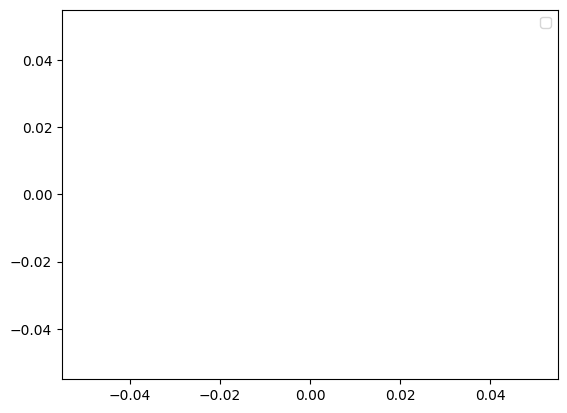

In [ ]:
loss_det = np.random.uniform(0.1, 0.9, 100)
loss_seg = np.random.uniform(0.1, 0.9, 100)

tasks_array = np.concatenate([loss_det.reshape(-1, 1), loss_seg.reshape(-1, 1)], axis=1)

weightdiff = []
weightdwa = []
losses = []

for i, tasks in enumerate(tasks_array):
    if i > 2:
        weightdiff.append(relativediff(tasks, last_tasks))
        weightdwa.append(dwa(tasks, last_tasks, 2, 2))
    else:
        last_tasks = tasks

for weight, tasks in zip(weightdwa, tasks_array[3:]):
    print(weight, tasks)
    losses.append(np.multiply(weight, tasks))

res = []
for a, b in zip(weightdiff, weightdwa):
    res.append(a - b)


losses_array = np.array(losses)
# plt.plot(loss_det)
# plt.plot(loss_seg)
# plt.plot(np.array(weightdiff)[:,0])
# plt.plot(np.array(weightdwa)[:,0])
plt.plot()
plt.legend(["relativediff", "dwa"])
plt.show()

In [ ]:
import torch

def graddrop(grads):
    print("Grads: ", grads)
    P = 0.5 * (1.0 + grads.sum(1) / (grads.abs().sum(1) + 1e-8))
    print("P: ", P)
    U = torch.rand_like(grads[:, 0])
    print("U: ", U)
    M = P.gt(U).view(-1, 1) * grads.gt(0) + P.lt(U).view(-1, 1) * grads.lt(0)
    print("M: ", M)
    g = (grads * M.float()).sum(1) # mean along the tasks
    print("g: ", g)
    return g

In [ ]:
grads = torch.tensor([
    [0.7, -0.3],
    [0.3, -0.7],
    [3.0, 1.0],
    [-0.5, -0.01]
])
g = graddrop(grads)

Grads:  tensor([[ 0.7000, -0.3000],
        [ 0.3000, -0.7000],
        [ 3.0000,  1.0000],
        [-0.5000, -0.0100]])
P:  tensor([0.7000, 0.3000, 1.0000, 0.0000])
U:  tensor([0.5752, 0.4711, 0.8109, 0.9768])
M:  tensor([[ True, False],
        [False,  True],
        [ True,  True],
        [ True,  True]])
g:  tensor([ 0.7000, -0.7000,  4.0000, -0.5100])
